# CERVICAL CANCER RISK PREDICTION IN WOMEN
---

Every year, just in India alone, around 122,000 women are diagnosed with cervical cancer, out of which around 67,000 die succumb to the disease. One of the primary reasons why the disease is so deadly is because cervical cancer is hard to detect, and the patient is usually diagnosed only in the later stages of the cancer.

This aim of this project is to create a binary classifier that is able to tell whether a woman is at the risk of cervical cancer or not. So let's begin by first importing all the necessary project dependencies.

## Importing Project Dependencies
---

In [20]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

Now, let us import the dataset.

In [21]:
data = pd.read_csv('risk_factors_cervical_cancer.csv', na_values='?')
data.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


Now that we have imported the dataset, the next step is to wrangle (preprocess) the dataset.

## Data Wrangling

Let us begin by checking for null values within our dataset.

In [22]:
data.info() # prints the number of non-null values and data type of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
Age                                   858 non-null int64
Number of sexual partners             832 non-null float64
First sexual intercourse              851 non-null float64
Num of pregnancies                    802 non-null float64
Smokes                                845 non-null float64
Smokes (years)                        845 non-null float64
Smokes (packs/year)                   845 non-null float64
Hormonal Contraceptives               750 non-null float64
Hormonal Contraceptives (years)       750 non-null float64
IUD                                   741 non-null float64
IUD (years)                           741 non-null float64
STDs                                  753 non-null float64
STDs (number)                         753 non-null float64
STDs:condylomatosis                   753 non-null float64
STDs:cervical condylomatosis          753 non-null float64
STDs:vaginal

As per resources like MayoClinic and WebMD, the STD HPV plays a key role in bringing about the DNA mutation that might end up turning the cervical tissues cancerous. Hence, we will drop all the rows for which the STDs:HPV value is a null value (NaN).   

In [23]:
# drop rows where STDs:HPV == NaN
data_cleaned = data[data['STDs:HPV'].notna()]

Now, let us drop the columns '__STDs: Time since first diagnosis__' and '__STDs: Time since last diagnosis__' since most values in these columns are null values.

In [24]:
# deleting unnecessary columns
data_cleaned.drop(columns=['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis'], axis=1, inplace=True)
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 753 entries, 0 to 857
Data columns (total 34 columns):
Age                                   753 non-null int64
Number of sexual partners             739 non-null float64
First sexual intercourse              747 non-null float64
Num of pregnancies                    706 non-null float64
Smokes                                743 non-null float64
Smokes (years)                        743 non-null float64
Smokes (packs/year)                   743 non-null float64
Hormonal Contraceptives               740 non-null float64
Hormonal Contraceptives (years)       740 non-null float64
IUD                                   737 non-null float64
IUD (years)                           737 non-null float64
STDs                                  753 non-null float64
STDs (number)                         753 non-null float64
STDs:condylomatosis                   753 non-null float64
STDs:cervical condylomatosis          753 non-null float64
STDs:vaginal

For the rest of the null values, we will simply replace them with the mode (highest frequent observation) of the respective columns.

In [25]:
# creating a dictionary that maps with what value each columns null values will be replaced
# Here, the filler is mode of the column
values = {
    'Number of sexual partners': data_cleaned['Number of sexual partners'].mode()[0],
    'First sexual intercourse': data_cleaned['First sexual intercourse'].mode()[0],
    'Num of pregnancies': data_cleaned['Num of pregnancies'].mode()[0],
    'Smokes': data_cleaned['Smokes'].mode()[0],
    'Smokes (years)': data_cleaned['Smokes (years)'].mode()[0],
    'Smokes (packs/year)': data_cleaned['Smokes (packs/year)'].mode()[0],
    'Hormonal Contraceptives': data_cleaned['Hormonal Contraceptives'].mode()[0],
    'Hormonal Contraceptives (years)': data_cleaned['Hormonal Contraceptives (years)'].mode()[0],
    'IUD': data_cleaned['IUD'].mode()[0],
    'IUD (years)': data_cleaned['IUD (years)'].mode()[0],
}

# replacing null values
data_cleaned.fillna(value=values, inplace=True)
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 753 entries, 0 to 857
Data columns (total 34 columns):
Age                                   753 non-null int64
Number of sexual partners             753 non-null float64
First sexual intercourse              753 non-null float64
Num of pregnancies                    753 non-null float64
Smokes                                753 non-null float64
Smokes (years)                        753 non-null float64
Smokes (packs/year)                   753 non-null float64
Hormonal Contraceptives               753 non-null float64
Hormonal Contraceptives (years)       753 non-null float64
IUD                                   753 non-null float64
IUD (years)                           753 non-null float64
STDs                                  753 non-null float64
STDs (number)                         753 non-null float64
STDs:condylomatosis                   753 non-null float64
STDs:cervical condylomatosis          753 non-null float64
STDs:vaginal

With this, we have dealt with all the missing/null values within our dataset. Now, let us have a look at the statistical analysis of the data. Since there are 34 columns, we will break the statistical analysis into 2 parts.

In [26]:
data_cleaned.iloc[:, :17].describe() # printing statistical analysis of first 17 columns

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis
count,753.00000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.0,753.000000,753.000000
mean,27.22842,2.519256,17.073041,2.235060,0.142098,1.210974,0.458142,0.644090,2.173831,0.110226,0.506600,0.104914,0.176627,0.058433,0.0,0.005312,0.057105
std,8.68086,1.670286,2.838513,1.459285,0.349383,4.115163,2.286894,0.479106,3.614502,0.313379,1.928602,0.306646,0.561993,0.234716,0.0,0.072739,0.232197
min,13.00000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,21.00000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,26.00000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
75%,33.00000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
max,84.00000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,22.000000,1.000000,19.000000,1.000000,4.000000,1.000000,0.0,1.000000,1.000000


In [27]:
data_cleaned.iloc[:, 17:].describe() # last 17 columns' statistical analysis

,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,753.000000,753.000000,753.000000,753.000000,753.0,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000
mean,0.023904,0.001328,0.001328,0.001328,0.0,0.023904,0.001328,0.002656,0.099602,0.023904,0.010624,0.023904,0.030544,0.046481,0.096946,0.054449,0.070385
std,0.152853,0.036442,0.036442,0.036442,0.0,0.152853,0.036442,0.051503,0.321089,0.152853,0.102593,0.152853,0.172194,0.210664,0.296080,0.227052,0.255965
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


For this project, we will be considering only the __Biopsy__ result as the target variable. The other __Dx__ and other possible target parameters will be dropped. 

__CHALLENGE:__ You can work on your own version of this project with any other target variable of your choice and see if you can a better performance. 

In [28]:
# dropping unnecessary columns
data_cleaned.drop(columns=['STDs: Number of diagnosis', 'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller', 'Citology'], inplace=True)
data_cleaned.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,34,1.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


Since this is just a starter notebook, we won't be performing any feature selection. We are going to use all the columns (other than the target columns obviously) as the feature variables for training our model. If you want to contribute to this project, you can recreate this model while selecting fewer feature variables in a way that you can get a better performance out of the model. 

Let us now normalize all the feature variables. Normalization is an important step. This is because it converts all the features to the same scale, ensuring that no single feature variable ends up a feature weight so large that it overshadows the effect of any other feature variable.  

In [29]:
# importing MinMaxScalar class to perform min-max scaling on the feature set
from sklearn.preprocessing import MinMaxScaler

# creating MinMaxScaler class object
scaler = MinMaxScaler()
# performing the scaling operation with fit_transform method
X = scaler.fit_transform(data_cleaned.iloc[:, :-1])
y = data_cleaned.iloc[:,-1]

print(X)

[[0.07042254 0.11111111 0.22727273 ... 0.         0.         0.        ]
 [0.02816901 0.         0.18181818 ... 0.         0.         0.        ]
 [0.29577465 0.         0.22727273 ... 0.         0.         0.        ]
 ...
 [0.16901408 0.03703704 0.31818182 ... 0.         0.         0.        ]
 [0.28169014 0.03703704 0.63636364 ... 0.         0.         0.        ]
 [0.22535211 0.03703704 0.45454545 ... 0.         0.         0.        ]]


Now, as the final step of our data preprocessing, let us split the data into training and test sets. 

In [30]:
# importing the train_test_split method
from sklearn.model_selection import train_test_split
# performing the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# printing the shape of the splits
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(602, 25) (151, 25) (602,) (151,)


Now, before we move on to the modeling part, let us perform some EDA that will help us understand our data better.

## Exploratory Data Analysis
---

First, let us observe the age distribution of the patients positively diagnosed with cervical cancer.

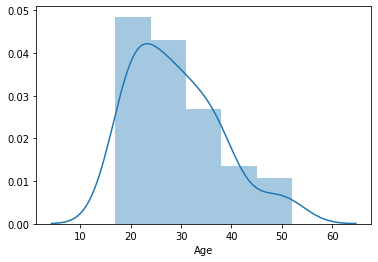

In [35]:

sns.distplot(data_cleaned['Age'][data_cleaned['Biopsy']==1])

The above plot shows that women between the age of 20-35 are at the highest risk of cervical cancer. Post the age of 50, the risk is significantly lower.  

Now, let us observe how smoking affects the chances of cervical cancer. 

Text(0.5, 1.0, 'Smoking and Cervical Cancer')

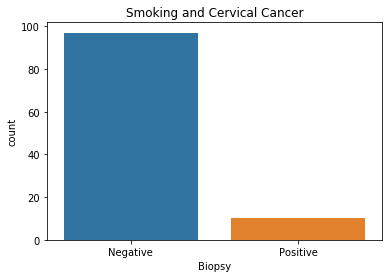

In [49]:
fig, ax = plt.subplots()
sns.countplot(data_cleaned['Biopsy'][data_cleaned['Smokes']==1], ax=ax)
ax.set_xticklabels(['Negative', 'Positive'])
ax.set_title('Smoking and Cervical Cancer')


As we can see from the above given plot, the observations don't reveal much that can be enough to derive any conclusion whether smoking can be a cause of cervical cancer. One reason for this can be the sampling bias within the data (more cases of negative diagnosis than positive ones.)

Let us now observe the relationship between hormonal contraceptives and cervical cancer. Hormonal contraceptives cause disruption in the natural ovulation cycle within women, and are known to have several side effects.

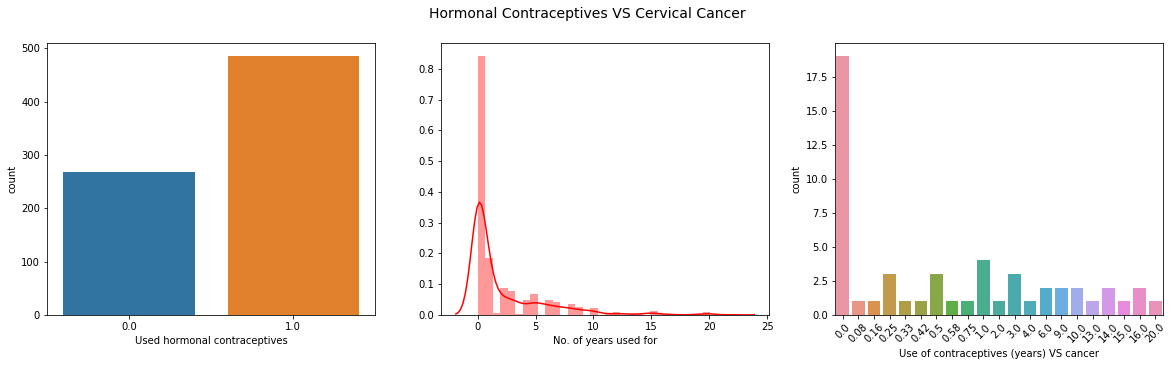

In [72]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('Hormonal Contraceptives VS Cervical Cancer', fontsize=14)
# plot 1
sns.countplot(data_cleaned['Hormonal Contraceptives'], ax=ax[0])
ax[0].set_xlabel('Used hormonal contraceptives')
# plot 2
sns.distplot(data_cleaned['Hormonal Contraceptives (years)'], color='red', ax=ax[1])
ax[1].set_xlabel('No. of years used for')
# plot 3
sns.countplot(data_cleaned['Hormonal Contraceptives (years)'][data_cleaned['Biopsy']==1])
ax[2].set_xlabel('Use of contraceptives (years) VS cancer')
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=45)
fig.show()

Here are the observations from the above given plots:
* Most of the women in the study were using or had used hormonal contraceptives in the past.
* The above given trend is reflected in the other plots as well. If we ignore those positively diagnosed patients that had not taken the contraceptives, we will observe that the relationship between term-of-use of the contraceptives and the number of positive diagnosis fluctuates up until the one year point. After that, the trend is more stable. This, to some point can point that contraceptives in the long run might be the cause of cervical cancer. However, this hypothesis can be a result of the sampling bias within the data.


Now let us do this same analysis for IUDs as well.

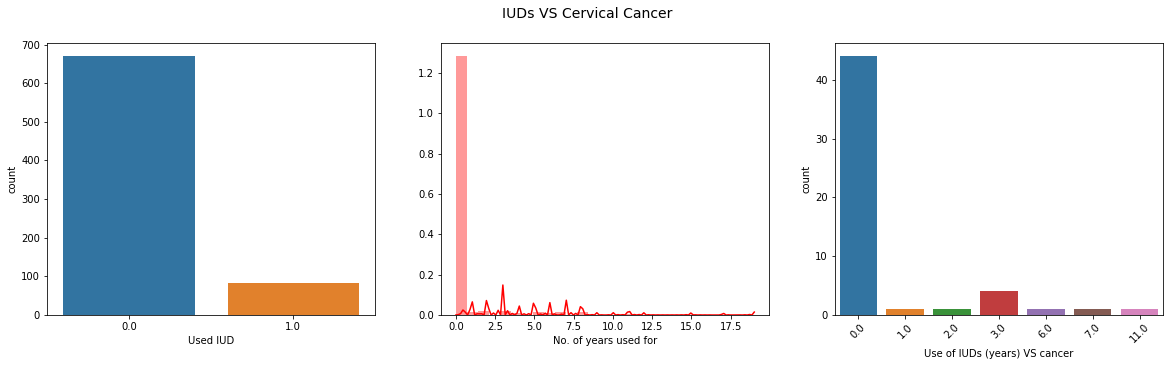

In [75]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('IUDs VS Cervical Cancer', fontsize=14)
# plot 1
sns.countplot(data_cleaned['IUD'], ax=ax[0])
ax[0].set_xlabel('Used IUD')
# plot 2
sns.distplot(data_cleaned['IUD (years)'], color='red', ax=ax[1])
ax[1].set_xlabel('No. of years used for')
# plot 3
sns.countplot(data_cleaned['IUD (years)'][data_cleaned['Biopsy']==1])
ax[2].set_xlabel('Use of IUDs (years) VS cancer')
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=45)
fig.show()

Observations from the above given plots:
* Most women in the survey didn't use IUDs. 
* From the above observations, IUDs don't seem to be having a considerable role in causing cervical cancer.  

With this, we come to the end of the EDA part. In the next section, we will be modeling a machine learning solution for classifying whether a female patient is at the risk of developing cervical cancer or not.

## Modeling
---

In this section, we will finally train our models and then compare their performances.

### 1. Decision Tree Classifier

In [79]:
# step-1: Importing the decision tree classifier class from sklearn
from sklearn.tree import DecisionTreeClassifier

# step-2: Creating class object w/ default parameters
tree_model = DecisionTreeClassifier()

# step-3: Training the model
tree_model.fit(X_train, y_train)

# step-4: Testing the model
from sklearn.metrics import accuracy_score # importing accuracy calculation method
y_test_preds = tree_model.predict(X_test) # generating predictions
print('Accuracy= '+ str(accuracy_score(y_test_preds, y_test) * 100) + '%')

Accuracy= 86.09271523178808%


Now, let us have a look at the confusion matrix for the results.

In [90]:
from sklearn.metrics import confusion_matrix

cfm = pd.DataFrame(confusion_matrix(y_test, y_test_preds))
cfm.columns= ['N', 'P']
cfm.index = ['N', 'P']
cfm

,N,P
N,128,10
P,11,2


From the above CF, we can see that there are a lot of fast positives (11) and false negatives (10) in case of our model's predictions. So despite having an 86% accuracy score, the performance is still not good. Now, we will perform the same two tasks (model and confusion matrix) with other model architectures like Logistic Regression, KNN Classifer, Support Vector Machines (SVMs) and Random Forest Classifier to see which model performs the best for this dataset. 

The following models have been left out as exercises for those who wish to contribute and work on their ML skills.

### 2. Logistic Regression 

In [91]:
# modeling and prediction code here

In [92]:
# confusion matrix code here

### 3. KNN Classification 

In [93]:
# modeling and prediction code here

In [ ]:
# confusion matrix code here

### 4. Support Vector Machine Classifier

In [94]:
# modeling and prediction code here

In [ ]:
# confusion matrix code here

### 5. Random Forest Classifier

In [95]:
# modeling and prediction code here

In [ ]:
# confusion matrix code here

With this, we come to an end of this project. Happy learning!